In [1]:
import pandas as pd

# Load datasets
ckd_data = pd.read_csv('kidney_disease.csv')  # Replace with the actual path to CKD dataset
diabetes_data = pd.read_csv('diabetes.csv')  # Replace with the actual path to Diabetes dataset
heart_disease_data = pd.read_csv('heart.csv')  # Replace with the actual path to Heart Disease dataset

# Example: Rename columns for CKD dataset (make sure these columns exist in your dataset)
ckd_data.rename(columns={
    'bp': 'blood_pressure',
    'age': 'age',
    'bgr': 'glucose_level',
    'al': 'albumin_level',
    'classification': 'disease_presence'
}, inplace=True)

# Example: Rename columns for Diabetes dataset (adjust column names based on your dataset)
diabetes_data.rename(columns={
    'BloodPressure': 'blood_pressure',
    'Age': 'age',
    'Glucose': 'glucose_level',
    'Outcome': 'disease_presence'
}, inplace=True)

# Example: Rename columns for Heart Disease dataset (adjust column names based on your dataset)
heart_disease_data.rename(columns={
    'trestbps': 'blood_pressure',
    'age': 'age',
    'chol': 'cholesterol',
    'target': 'disease_presence'
}, inplace=True)

# Select only common columns
common_cols = ['age', 'blood_pressure', 'disease_presence']
ckd_data = ckd_data[common_cols]
diabetes_data = diabetes_data[common_cols]
heart_disease_data = heart_disease_data[common_cols]

# Concatenate datasets into a single DataFrame
chronic_disease_data = pd.concat([ckd_data, diabetes_data, heart_disease_data], ignore_index=True)

# Save to CSV
chronic_disease_data.to_csv('chronic_disease_dataset.csv', index=False)
print("Combined dataset saved as 'chronic_disease_dataset.csv'")

Combined dataset saved as 'chronic_disease_dataset.csv'


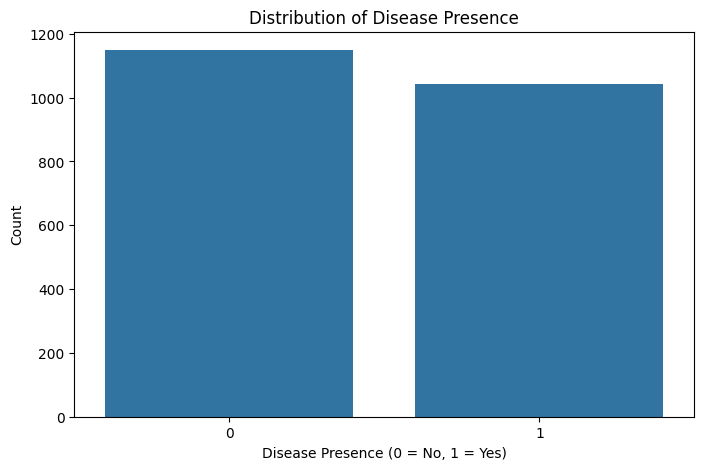

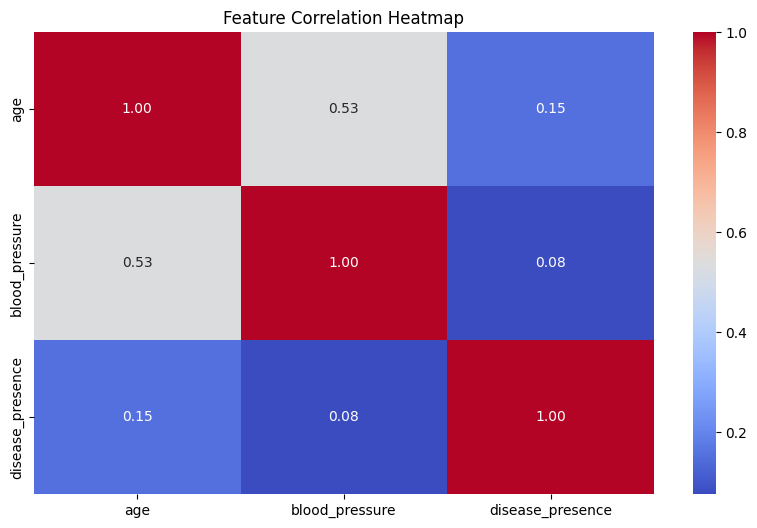

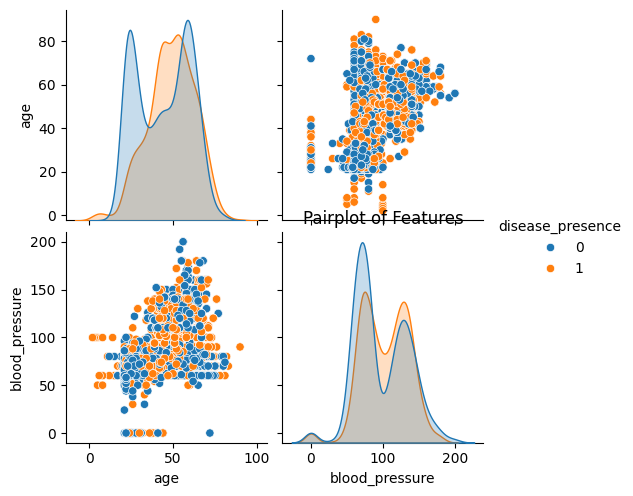

Random Forest Accuracy: 73.35%
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       241
           1       0.72      0.68      0.70       198

    accuracy                           0.73       439
   macro avg       0.73      0.73      0.73       439
weighted avg       0.73      0.73      0.73       439

SVM Accuracy: 68.56%
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       241
           1       0.65      0.65      0.65       198

    accuracy                           0.69       439
   macro avg       0.68      0.68      0.68       439
weighted avg       0.69      0.69      0.69       439

XGBoost Accuracy: 72.67%
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       241
           1       0.70      0.68      0.69       198

    accuracy                           0.73       439
   macro avg       0.72      0.72      0.72       4

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # To save the best model
import matplotlib.pyplot as plt
import seaborn as sns




# Load the dataset
data = pd.read_csv('chronic_disease_dataset.csv')

# Checking for missing values
data.fillna(data.mean(), inplace=True)

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
data['disease_presence'] = label_encoder.fit_transform(data['disease_presence'])

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='disease_presence', data=data)
plt.title('Distribution of Disease Presence')
plt.xlabel('Disease Presence (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot to see relationships
sns.pairplot(data, hue='disease_presence')
plt.title('Pairplot of Features')
plt.show()

# Separate features and target variable
X = data.drop('disease_presence', axis=1)
y = data['disease_presence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42, probability=True)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)


# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, preds))
    return accuracy, model

# Train and evaluate models
rf_accuracy, rf_model_trained = train_and_evaluate(rf_model, X_train, y_train, X_test, y_test, "Random Forest")
svm_accuracy, svm_model_trained = train_and_evaluate(svm_model, X_train, y_train, X_test, y_test, "SVM")
xgb_accuracy, xgb_model_trained = train_and_evaluate(xgb_model, X_train, y_train, X_test, y_test, "XGBoost")

# Determine the best-performing model
best_model = max((rf_accuracy, "Random Forest"), (svm_accuracy, "SVM"), (xgb_accuracy, "XGBoost"))
print(f"Best Model: {best_model[1]} with Accuracy: {best_model[0] * 100:.2f}%")

# Save the best model
if best_model[1] == "Random Forest":
    joblib.dump(rf_model_trained, 'best_model.pkl')
elif best_model[1] == "SVM":
    joblib.dump(svm_model_trained, 'best_model.pkl')
else:
    joblib.dump(xgb_model_trained, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")